## Installing Dependent Packages


In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [56]:
df = pd.read_csv("./marketing_data.csv")

In [57]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [58]:
def data_info(df):
    print('no_of_rows:', df.shape[0], ' no_of_columns:', df.shape[1])
    print('This dataset has', df[df.duplicated()].shape[0], 'duplicated_rows')
    print(" ")
    print("Descriptive statistical information about dataset")
    print(" ")
    print(df.describe())
    print("Information about this dataset: ")
    print(" ")
    print(df.info())

In [59]:
data_info(df)

no_of_rows: 2240  no_of_columns: 28
This dataset has 0 duplicated_rows
 
Descriptive statistical information about dataset
 
                 ID   Year_Birth      Kidhome     Teenhome      Recency  \
count   2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804     0.444196     0.506250    49.109375   
std     3246.662198    11.984069     0.538398     0.544538    28.962453   
min        0.000000  1893.000000     0.000000     0.000000     0.000000   
25%     2828.250000  1959.000000     0.000000     0.000000    24.000000   
50%     5458.500000  1970.000000     0.000000     0.000000    49.000000   
75%     8427.750000  1977.000000     1.000000     1.000000    74.000000   
max    11191.000000  1996.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.52

### Assessment report: 

**Quality issues**

- There is a space in front of the income's column name
- There are dollar signs is the values of Income column
- The "Income" column has 23 missing values
- Income's type is string
- Dt_Customer's type is string

## 1) Data Cleaning

In [60]:
# make a copy of the dataframe
df_copy = df.copy()

In [61]:
df_copy.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

#### Issue 1: There is a space infront of the Income column

In [67]:
df_copy.rename(columns={' Income ':'Income'}, inplace=True)

In [68]:
df_copy.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

#### Issue 3: There are some dollar sign on Income columns so remove them

In [77]:
df_copy.Income = df_copy.Income.str.strip('$')
df_copy.Income = df_copy.Income.str.replace(".", "")
df_copy.Income = df_copy.Income.str.replace(",", "")
df_copy.Income = df_copy.Income.str.replace("00 ", "")

In [78]:
df_copy.Income

0       84835
1       57091
2       67267
3       32474
4       21474
        ...  
2235    66476
2236    31056
2237    46310
2238    65819
2239    94871
Name: Income, Length: 2240, dtype: object

In [79]:
#remove the data from the dataframe
missing_value = df_copy[df_copy.Income.isnull() == True]
have_income = df_copy[df_copy.Income.isnull() == False]

In [81]:
print("Number of values with data present =",have_income.shape[0])
print("Number of missing values in our dataset =",missing_value.shape[0])

Number of values with data present = 2216
Number of missing values in our dataset = 24


In [91]:
#check the data type for have income dataframe
have_income.Income.dtype ## which is an "Object" type

dtype('O')

In [92]:
#Convert it into an integer type
have_income.Income = have_income.Income.astype(int)

C:\Users\USER\anaconda3\envs\DSND\lib\site-packages\pandas\core\generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [97]:
missing_value.Income = str(have_income.Income.median())

In [102]:
missing_value.Income = missing_value.Income.str.replace(".5", "")
missing_value.Income = missing_value.Income.astype(int)

In [105]:
# append the two dataframes into one 
df_copy = missing_value.append(have_income)

#### **Issue 4: Dt_Customer's type is string**

In [106]:
df_copy.Dt_Customer = pd.to_datetime(df_copy.Dt_Customer)
df_copy.Dt_Customer

134    2012-11-19
262    2013-11-15
394    2014-03-02
449    2013-02-20
525    2013-07-11
          ...    
2235   2013-03-07
2236   2013-01-22
2237   2012-12-03
2238   2012-11-29
2239   2012-09-01
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [111]:
# Store the file
df_copy.reset_index(drop=True)
df_copy.to_csv('marketing data/clean_marketing_data.csv', index=False)

## 2. Exploratory Data Analysis (EDA)

In [113]:
df = pd.read_csv('./marketing data/clean_marketing_data.csv')

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2240 non-null   int64 
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

### 2.1 Check for Outliers

Text(0.5, 0.9, 'Finding Outliers')

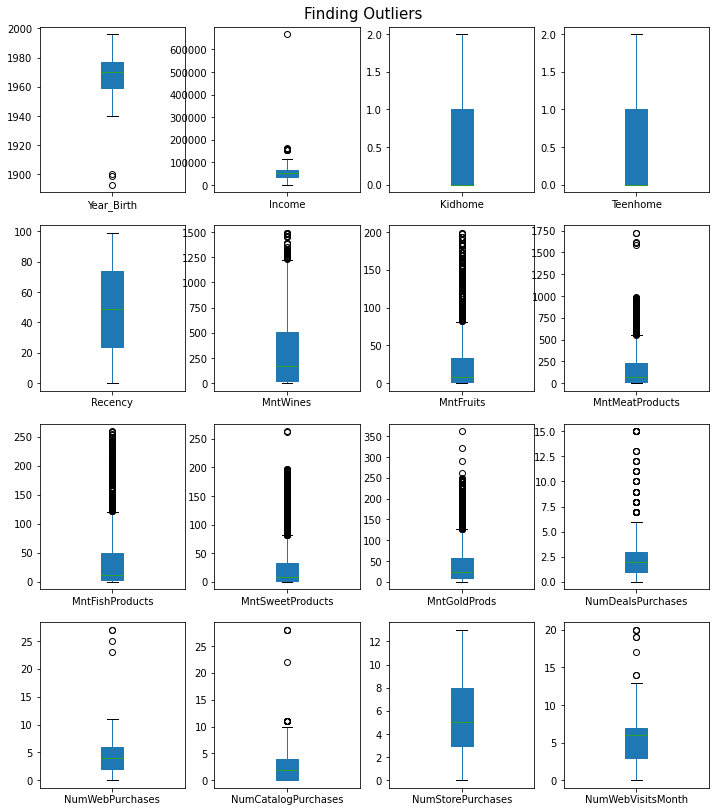

In [116]:
# select columns to plot
df_to_plot = df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
                              'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=['int64'])

# subplots
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.suptitle('Finding Outliers', fontsize=15, y=0.9)

In [117]:
df.Year_Birth.describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

In [118]:
# Remove outliers in year_birth in order to get a better distribution under 3rd quartile range

new_df = df[df.Year_Birth >= (df.Year_Birth.mean()-3*df.Year_Birth.std())]
new_df.Year_Birth.describe()

count    2237.000000
mean     1968.901654
std        11.701917
min      1940.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

### 2.2 `Feature Engineering` 
#### Are there any useful variables that you can engineer with the given data?

- Join_year: The year that person became a customer, which can be engineered from "Dt_Customer"

- Join_month: The month that person became a customer, which can be engineered from "Dt_Customer"
- Join_weekday: The day of the week that person became a customer, which can be engineered from "Dt_Customer"
- Minorhome: The total amount of minors in their family, which can be acquired by summing up by Kidhome and Teenhome.
- Total_Mnt: Total amount spent in the last two years, which can be acquired by summing up all the "Mnt"-related columns
- Total_num_purchase: Total number of purchases in the last two years, which can be acquired by summing up all the "Num"-related columns
- Total_accept: Total amount a customer accepted the offer in marketing campaign, which can be acquired by summing up all the "Accepted"-related columns and the "Response" column
- "AOV": AOV stands for the average order volumn of each customer, which can be engineerd by dividing Total_Mnt by Total_num_purchase

In [119]:
new_df.Dt_Customer = pd.to_datetime(new_df.Dt_Customer)

C:\Users\USER\anaconda3\envs\DSND\lib\site-packages\pandas\core\generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [132]:
new_df["Join_year"] = new_df.Dt_Customer.dt.year
new_df["Join_month"] = new_df.Dt_Customer.dt.month
new_df["Join_weekday"] = new_df.Dt_Customer.dt.weekday
new_df["Minorhome"] = new_df.Kidhome + new_df.Teenhome
new_df['Total_Mnt'] = new_df.MntWines+ new_df.MntFruits+ new_df.MntMeatProducts+ new_df.MntFishProducts+ new_df.MntSweetProducts+ new_df.MntGoldProds 
new_df['Total_num_purchase'] = new_df.NumDealsPurchases+ new_df.NumWebPurchases+ new_df.NumCatalogPurchases+ new_df.NumStorePurchases+ new_df.NumWebVisitsMonth 
new_df['Total_accept'] = new_df.AcceptedCmp1 + new_df.AcceptedCmp2 + new_df.AcceptedCmp2 + new_df.AcceptedCmp2  + new_df.AcceptedCmp3 + new_df.AcceptedCmp4 + new_df.AcceptedCmp5 + new_df.Response
new_df['AOV'] = new_df.Total_Mnt/new_df.Total_num_purchase

C:\Users\USER\anaconda3\envs\DSND\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\USER\anaconda3\envs\DSND\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\USER\anaconda3\envs\DSND\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [133]:
new_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Country,Join_year,Join_month,Join_weekday,Minorhome,Total_Mnt,Total_num_purchase,Total_accept,AOV
0,8996,1957,PhD,Married,51381,2,1,2012-11-19,4,230,...,0,GER,2012,11,0,3,603,38,0,15.868421
1,1994,1983,Graduation,Married,51381,1,0,2013-11-15,11,5,...,0,US,2013,11,4,1,19,11,0,1.727273
2,3769,1972,PhD,Together,51381,1,0,2014-03-02,17,25,...,0,AUS,2014,3,6,1,42,12,0,3.500000
3,5255,1986,Graduation,Single,51381,1,0,2013-02-20,19,5,...,0,AUS,2013,2,2,1,637,28,0,22.750000
4,8268,1961,PhD,Married,51381,0,1,2013-07-11,23,352,...,0,CA,2013,7,3,1,404,23,0,17.565217


### 2.3 `ANOMALY DETECTION AND TREND ANALYSIS`

#### Do you notice any patterns or anomalies in the data? Can you plot them?
We can use a `heatmap` to see the correlations between each variable. When it gets bluer, it means they are positively correlated, and when it gets redder, they are negatively correlated.

#### 2.3.1 `Patterns:` 
1. High Income People
    - tend to spend more and purchase more.
    - tend to visit the company's website less frequently than other people. 
    - tend to have few number of purchases made with a discount

2. People having kids at home
    - tend to spend less and purchase less.
    - tend to has high number of purchases made with a discount


3. People who purchased with high average order volumne 
    - tend to buy more wines and meat products
    - tend to make high number of purchases made using a catalog
    - tend to not visit the company's website. 

### CORRELATION ANALYSIS


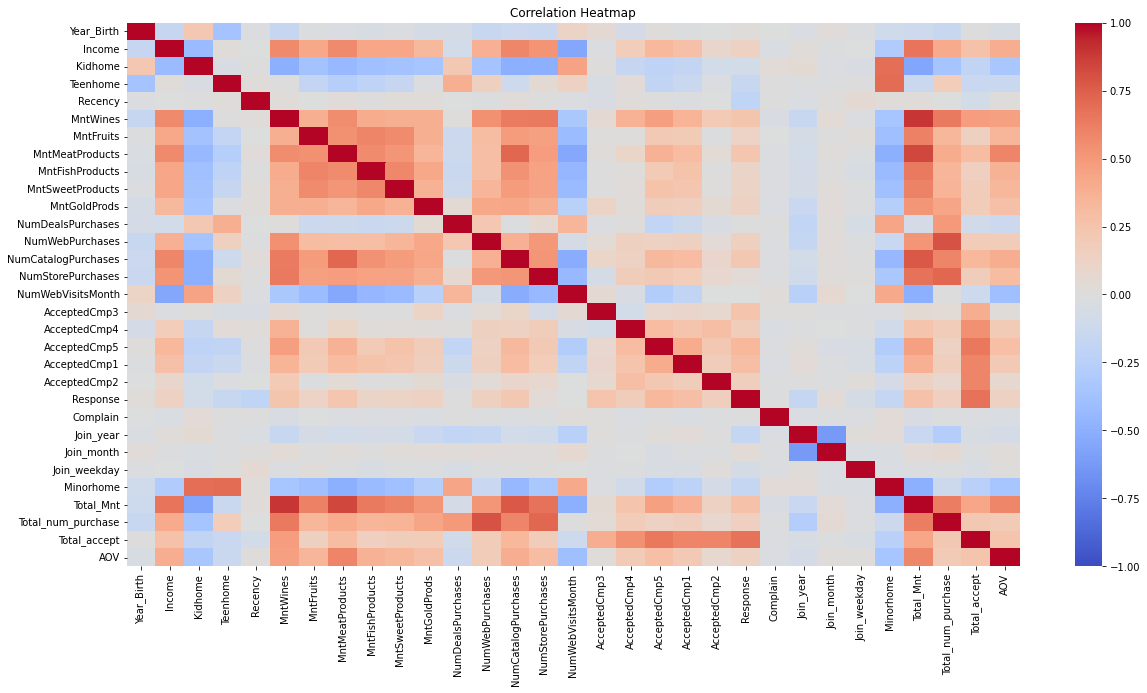

In [148]:
df_to_plot = new_df.drop(columns=['ID'], axis = 1)
plt.figure(figsize=(20,10))
s = sns.heatmap(data = df_to_plot.corr(), cmap = 'coolwarm', vmin = -1, vmax = 1, center=0)
plt.title("Correlation Heatmap")
plt.savefig('Images/heatmap.png', bbox_inches='tight')
plt.show()

### 2.3.2 `Anomalies:`

Intuitively, I'd think the more complaints a customer has, the less he/she may spend on our store, but the number of complain in the last two years has almost no correlation with the total amount spent in the last two years

In [153]:
new_df[new_df['Complain'] == 1]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Country,Join_year,Join_month,Join_weekday,Minorhome,Total_Mnt,Total_num_purchase,Total_accept,AOV
229,10995,1988,2n Cycle,Married,15716,1,0,2012-11-12,8,16,...,1,SA,2012,11,0,1,92,18,0,5.111111
319,10401,1976,2n Cycle,Together,26326,0,0,2013-09-04,12,1,...,1,GER,2013,9,2,0,18,7,0,2.571429
377,5726,1983,Master,Single,31788,1,0,2014-03-20,15,16,...,1,SA,2014,3,3,1,60,15,0,4.000000
574,9483,1959,Graduation,Together,57957,0,1,2013-08-19,24,290,...,1,CA,2013,8,0,1,637,28,0,22.750000
680,10971,1977,Graduation,Single,37774,2,0,2012-09-03,28,173,...,1,SP,2012,9,0,2,473,25,2,18.920000
746,255,1951,Graduation,Divorced,22263,1,1,2014-03-30,31,17,...,1,SP,2014,3,6,2,21,12,0,1.750000
793,359,1950,Graduation,Together,48070,0,1,2013-01-13,33,373,...,1,SP,2013,1,6,1,504,26,0,19.384615
960,3710,1984,PhD,Single,39684,1,0,2012-10-12,41,19,...,1,SP,2012,10,4,1,81,14,1,5.785714
1016,6201,1978,Graduation,Single,38643,1,1,2013-11-29,45,22,...,1,SP,2013,11,4,2,49,14,0,3.500000
1103,7966,1959,Graduation,Single,80982,1,1,2013-01-08,48,505,...,1,SP,2013,1,1,2,1191,35,0,34.028571


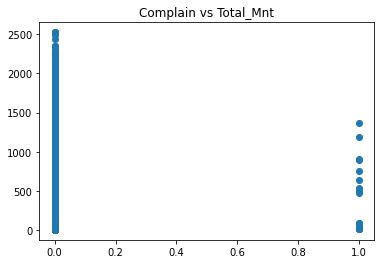

In [156]:
#visualize the anomalies between high "Complain" and "Total_amount"
plt.scatter(data = new_df, x = 'Complain', y = 'Total_Mnt')
plt.title("Complain vs Total_Mnt");

`After further investigating the data, I found that it is because we only have 20 customers who complained in the last two years, but we have 2200 customers in total. The customer service in the company has done a wonderful job in the last two years.`

## 3. Statistical Analysis

To perform statistical analysis, we will be calculating pearon's correlation factor and p-value for any two predictor varaibles.

In [157]:
from scipy.stats import pearsonr

r, p_value  =  pearsonr(x=new_df['Complain'], y=new_df['Total_Mnt'])

# print results
print('Pearson correlation (r): ', r)
print('Pearson p-value: ', p_value)

Pearson correlation (r):  -0.03373965091266398
Pearson p-value:  0.11063526070950919


In [168]:
new_df[new_df.Complain > 0].ID.nunique()

20

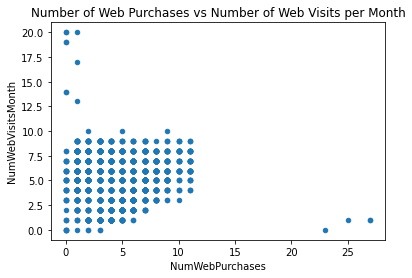

In [169]:
# Visualize NumWebPurchases vs NumWebVisitsMonth

new_df.plot(x='NumWebPurchases', y='NumWebVisitsMonth', kind='scatter')
plt.title("Number of Web Purchases vs Number of Web Visits per Month");

### 3.1 Feature Importance Using `Random Forest Regressor`

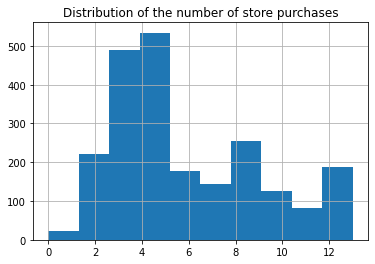

In [170]:
new_df.NumStorePurchases.hist()
plt.title("Distribution of the number of store purchases");

In [171]:
# drop ID as everyone has unique ID
rd_df = new_df.drop(columns=['ID', 'Dt_Customer'])
rd_df.replace([np.inf, -np.inf], 0, inplace=True)

# One-hot encoding
rd_df = pd.get_dummies(rd_df)

# Import train_test_split function
from sklearn.model_selection import train_test_split

X=rd_df.drop(columns=['NumStorePurchases'])  # Features
y=rd_df['NumStorePurchases']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
# 70% training and 30% test

#Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor

#Create a Random Forest Classifier with 100 trees
rg = RandomForestRegressor(n_estimators=200, n_jobs=-1)

# Train the model using the training sets y_pred=clf.predict(X_test)
rg.fit(X_train, y_train)

y_pred=rg.predict(X_test)

from sklearn import metrics

print("Model score:", rg.score(X_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Model score: 0.8615977147323529
Mean Absolute Error: 0.7761755952380953
Mean Squared Error: 1.3990563988095237
Root Mean Squared Error: 1.182817145128326


`Finding: The range of NumStorePurchases is 13, and the Root Mean Squared Error is only 1.1(less than 10% of the range), which means it is a relaible model.`

### B) Find feature importance scores based on `mean decrease in Impurity`